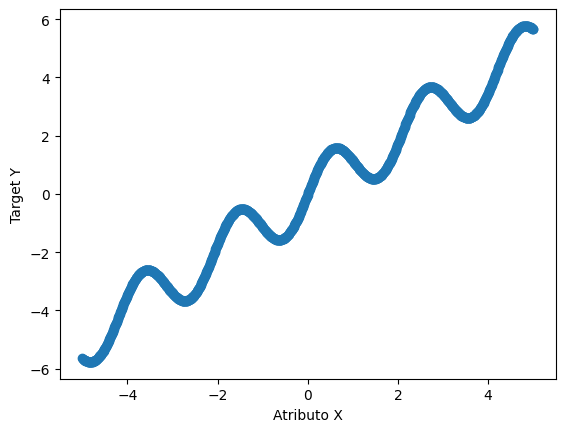

In [1]:
# Importación de librerías
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Generación de un dataset aleatorio con una variable X y una variable Y
X = np.linspace(-5 , 5, 1000).reshape(1000, 1)

y_limpia = np.sin(3 * X) + X

# Representación de los datos
plt.scatter(X, y_limpia)
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

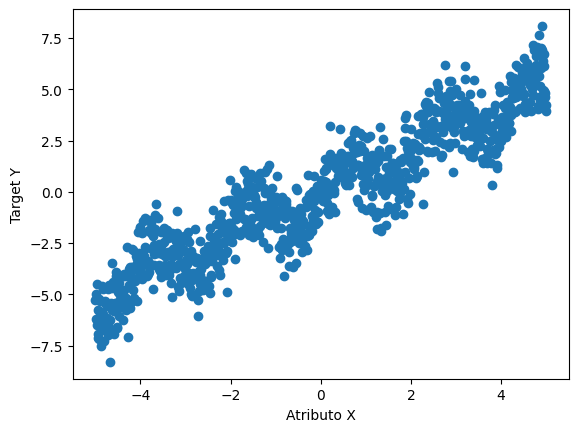

In [2]:
# Se añade ruido a la salida Y para tener una función menos "ideal"
y_ruido = np.random.normal(size=len(X)).reshape(y_limpia.shape)
y = y_limpia + y_ruido
plt.scatter(X, y)
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

El mejor estimador es: DecisionTreeRegressor(max_depth=4)
La R^2 en los datos de train es: 0.91
La R^2 en los datos de test es: 0.89


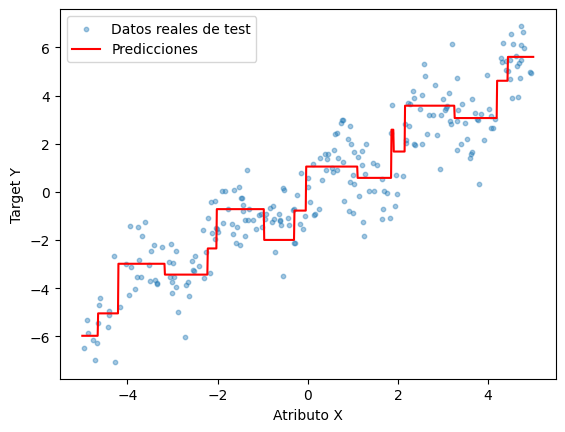

In [19]:
# División en dos datasets: train (con el que se optimizan los hiperparámetros)
# y test (con el que se prueba el rendimiento del modelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# Obtención del mejor parámetro de profundidad del árbol entre 3 y 7
# usando validación cruzada y GridSearchCV
regr = DecisionTreeRegressor()
params = {"max_depth": range(3, 7)}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, y_train)
print('El mejor estimador es: {}'.format(regr_opt.best_estimator_))
y_train_pred = regr_opt.predict(X_train)
y_test_pred = regr_opt.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))
X_fit = np.linspace(-5, 5, 1000).reshape(1000, 1)
y_fit = regr_opt.predict(X_fit)
plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

La R^2 en los datos de train es: 0.98
La R^2 en los datos de test es: 0.83


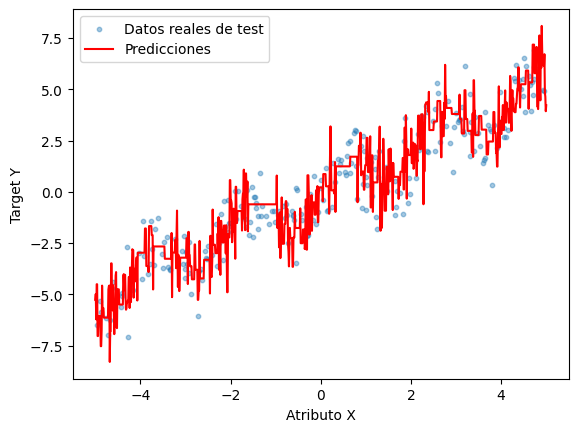

In [4]:
# Utilización de un modelo sobreajustado, incrementando mucho la profundidad del árbol
regr_overfitted = DecisionTreeRegressor(max_depth=10)
regr_overfitted.fit(X_train, y_train)

# Se predice en train y test
y_train_pred = regr_overfitted.predict(X_train)
y_test_pred = regr_overfitted.predict(X_test)
y_overfitted = regr_overfitted.predict(X_fit)

# Obtención de las métricas en train y en test
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

# Representación de las predicciones y los datos reales
plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_overfitted, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()